In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_cleaned = pd.read_csv('final_dataset.csv')

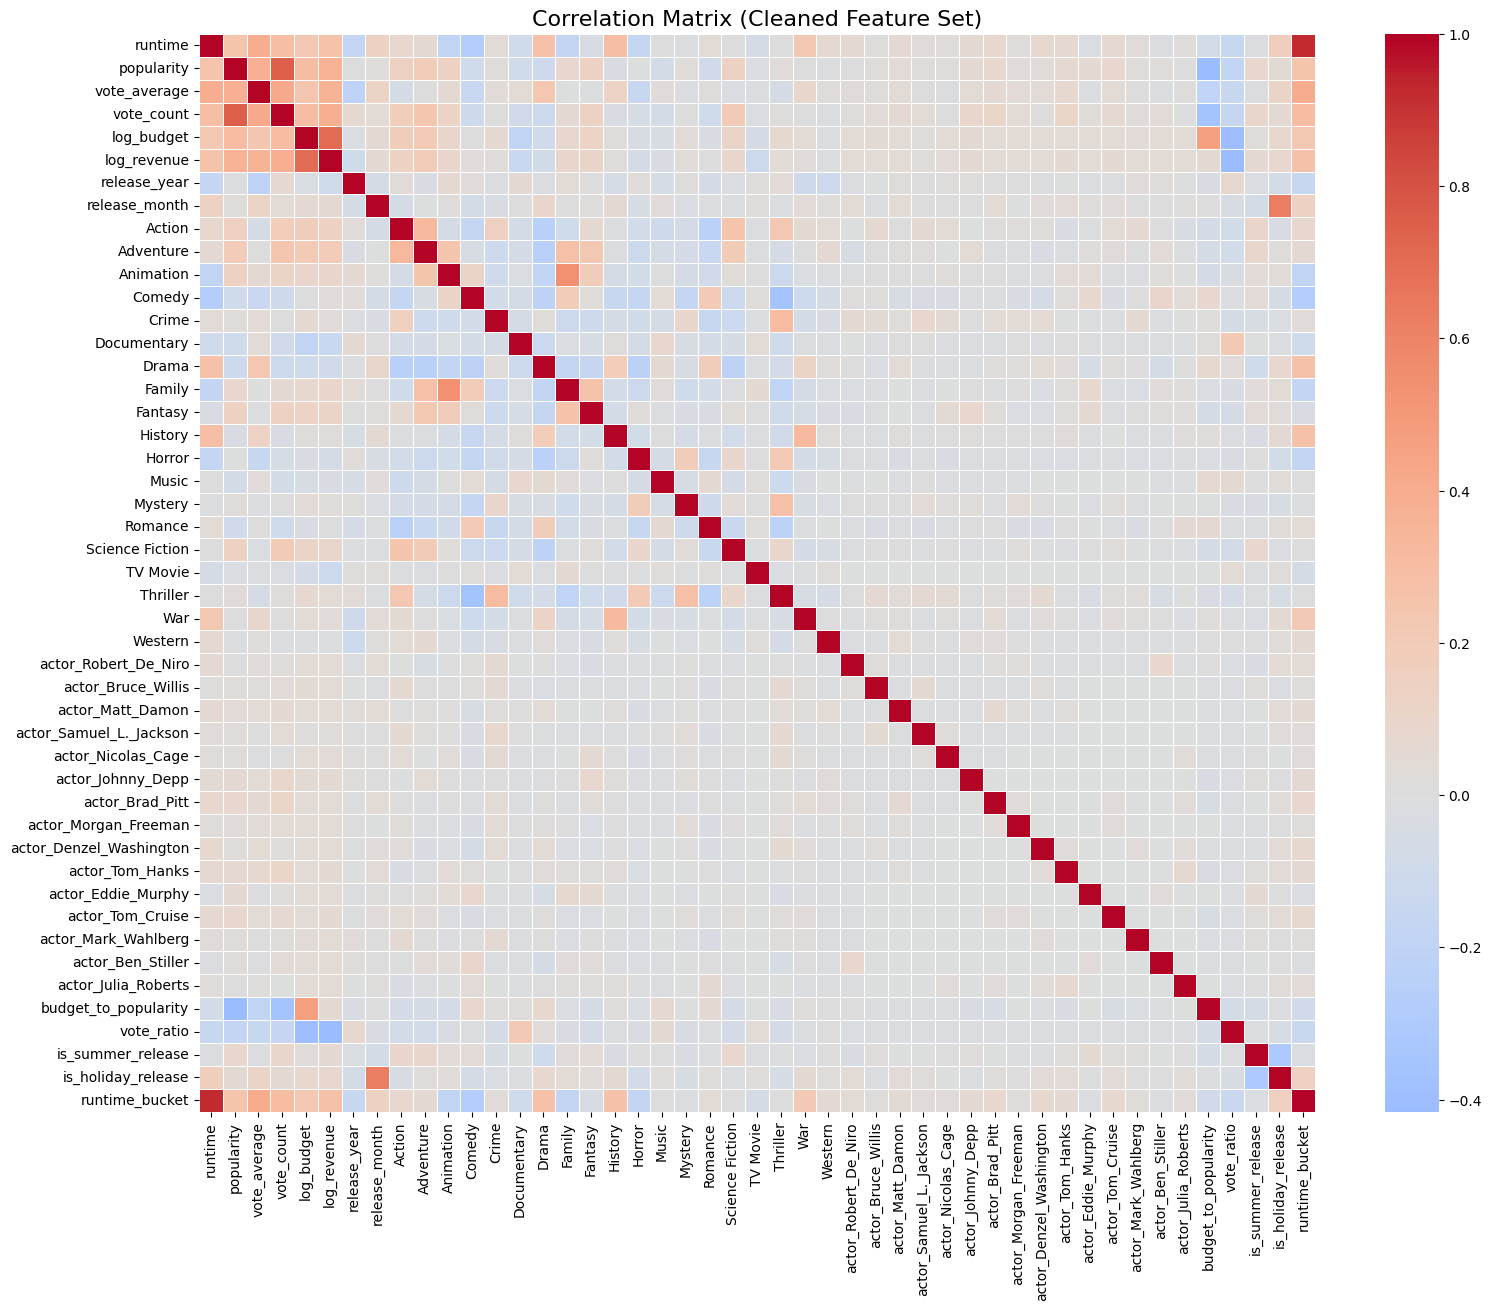

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df_cleaned.copy()
df_copy.drop(columns=["movie_id", "title_x", "title_y"], inplace=True)

corr_matrix_cleaned = df_copy.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix_cleaned, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix (Cleaned Feature Set)", fontsize=16)
plt.show()

In [ ]:
target_corr = corr_matrix_cleaned["log_revenue"].drop("log_revenue").sort_values(ascending=False)

print("Top 10 positively correlated features with log_revenue:")
print(target_corr.head(10))

print("\nTop 10 negatively correlated features with log_revenue:")
print(target_corr.tail(10))

Top 10 positively correlated features with log_revenue:
log_budget        0.706311
vote_count        0.383953
popularity        0.370738
vote_average      0.361971
runtime_bucket    0.267458
runtime           0.262924
Adventure         0.197464
Action            0.140204
Fantasy           0.120483
Family            0.094382
Name: log_revenue, dtype: float64

Top 10 negatively correlated features with log_revenue:
actor_Samuel_L._Jackson    0.018721
Romance                    0.003849
Western                   -0.007227
Music                     -0.030361
Horror                    -0.061770
Drama                     -0.087483
release_year              -0.097849
TV Movie                  -0.121355
Documentary               -0.144418
vote_ratio                -0.415942
Name: log_revenue, dtype: float64


Since vote ratio has a very negative correlation, they add noise to the dataset, we will drop it from the final dataset.

In [ ]:
target_corr['runtime_bucket']

np.float64(0.2674580658776236)

In [ ]:
df_cleaned.drop(columns=["vote_ratio"], inplace=True)

To reduce dimensionality and help models generalize better, we are grouping together low-impact features into 'genre_other'.

In [ ]:
low_corr_genres = ['Romance', 'Western', 'Music', 'Horror', 'Drama', 'TV Movie', 'Documentary']
df_cleaned['genre_other'] = df_cleaned[low_corr_genres].max(axis=1)
df_cleaned.drop(columns=low_corr_genres, inplace=True)

In [ ]:
df.to_csv('final_dataset_v2.csv', index=False)

AttributeError: module 'pandas' has no attribute 'to_csv'